In [1]:
import seaborn as sns
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
ALGORITHMS = ['hist', 'lblint_ix', 'bib', 'tang', 'sed', 'lblint']
BASEPATH = 'school/ted-ds'

In [3]:
from os.path import exists

def load_dataset(dataset: str, threshold: int):
    algorithm_times = dict()
    for ALG in ALGORITHMS:
        path = f'{BASEPATH}/{dataset}/{ALG}_us.txt'
        if not exists(path):
            print(ALG, 'is not computed for', dataset, ' skipping')
            continue
        
        path2 = f'{BASEPATH}/{dataset}/precision-{ALG}-{threshold}.txt'
        df = pd.read_csv(path, names=["time"])
        precision = pd.read_csv(path2, delimiter=';')
        algorithm_times[ALG] = [df, precision]

    return algorithm_times

In [4]:
algs = load_dataset('swissprot', 20)

tang is not computed for swissprot  skipping
sed is not computed for swissprot  skipping
lblint is not computed for swissprot  skipping


In [5]:
algs['hist'][1]['Precision'][0]

53.8202

In [4]:
def draw_results(dataset_name: str, threshold: int):
    algs = load_dataset(dataset_name, threshold)
    for alg, [df, summary] in algs.items():
        sns.histplot(data=df)
        plt.title(f'{alg.capitalize()} - precision: {summary["Precision"][0]:.2f}%')
        plt.xlabel('Milliseconds')
        plt.show()

    return algs

In [5]:
tested_values= [('swissprot', 20), ('bolzano', 20), ('python', 30), ('sentiment', 10)]

In [6]:
dataframes = dict()
for ds, t in tested_values:
    dataframes[ds] = load_dataset(ds, t)

tang is not computed for swissprot  skipping
sed is not computed for swissprot  skipping
lblint is not computed for swissprot  skipping
tang is not computed for python  skipping
sed is not computed for python  skipping
lblint is not computed for python  skipping


In [7]:
dataframes['sentiment']['sed'][0].size

9645

In [8]:
df = pd.DataFrame()
for alg in dataframes['sentiment'].keys():
    times = dataframes['sentiment'][alg][0].copy()
    times['alg'] = alg
    df = pd.concat([df, times])
df.head()

,time,alg
0,0,hist
1,0,hist
2,0,hist
3,0,hist
4,0,hist


<Axes: xlabel='alg', ylabel='time'>

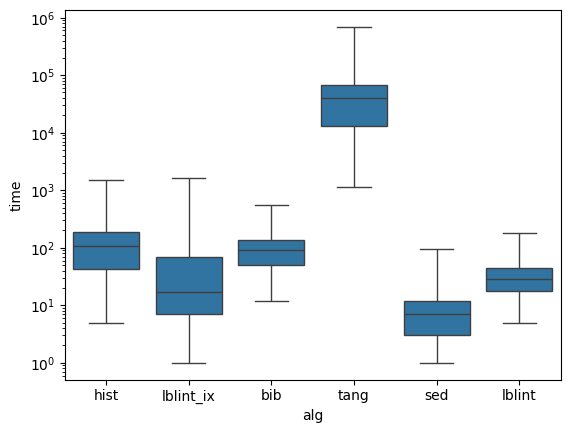

In [11]:
sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False)

In [12]:
df = pd.DataFrame()
for alg in dataframes['python'].keys():
    if alg == 'tang':
        continue
    times = dataframes['python'][alg][0].copy()
    times['alg'] = alg
    df = pd.concat([df, times])
df.head()

,time,alg
0,0,hist
1,0,hist
2,0,hist
3,0,hist
4,0,hist


<Axes: xlabel='alg', ylabel='time'>

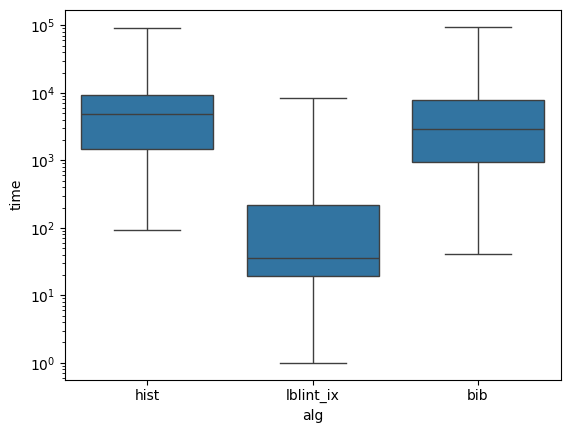

In [13]:
sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False)

In [ ]:
dataframes['sentiment']['hist'].size

Printing  swissprot
Printing  bolzano
Printing  python
Printing  sentiment


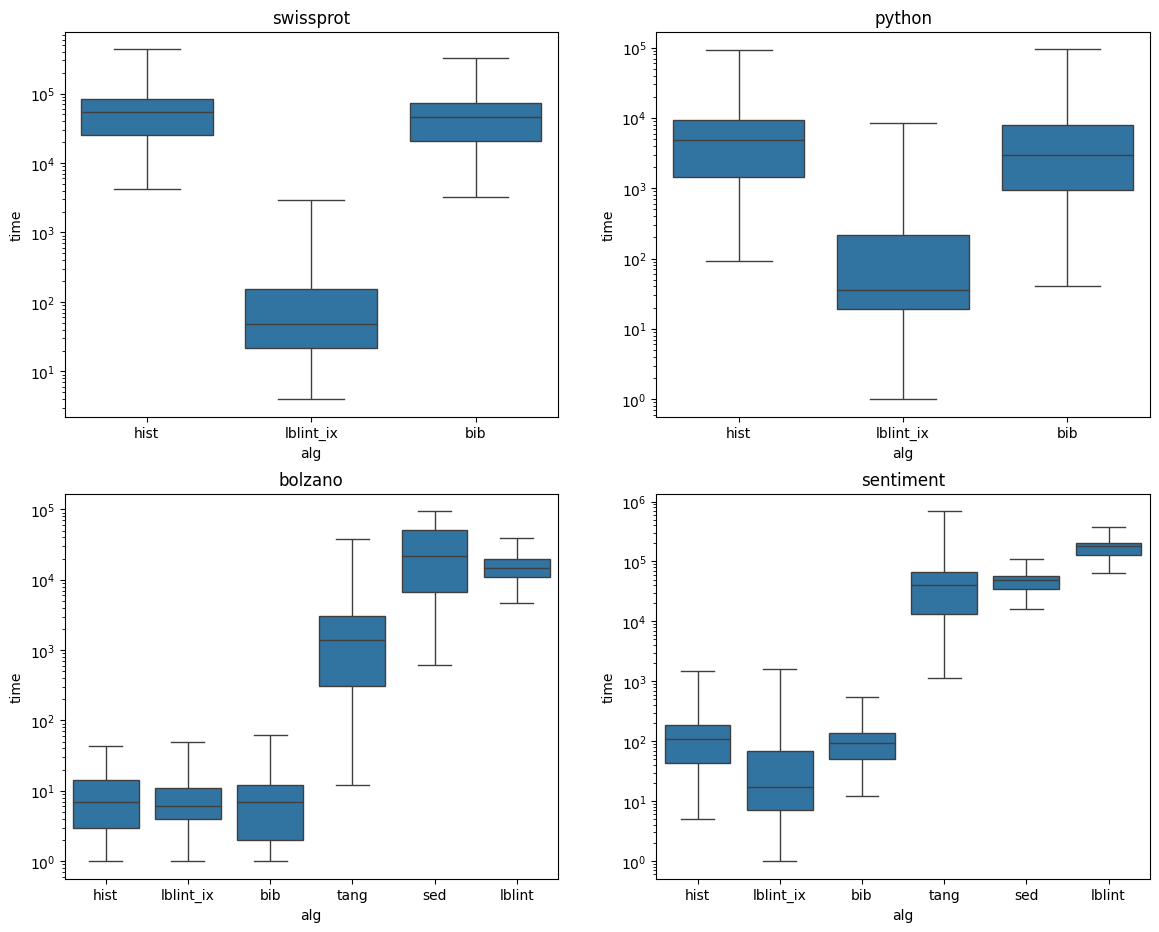

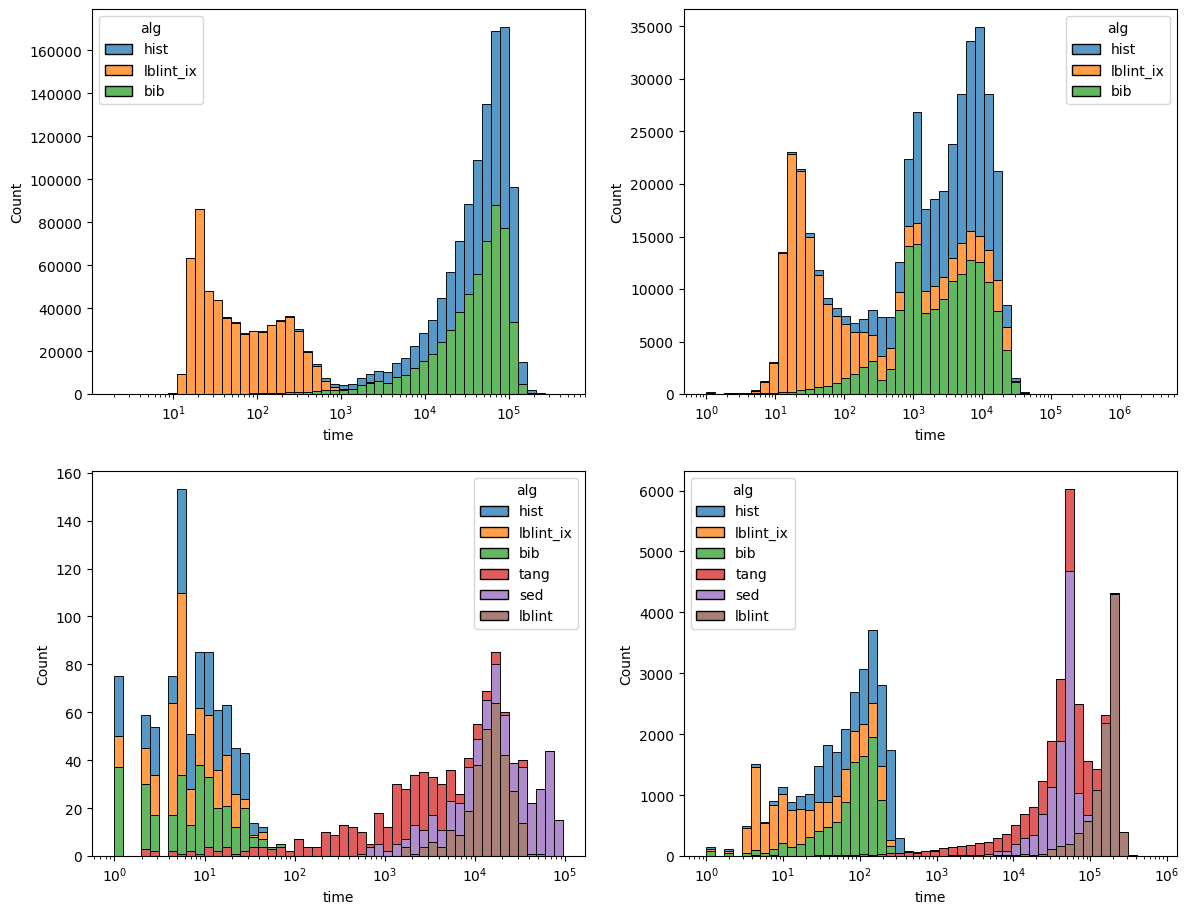

In [62]:
f, axes = plt.subplots(2, 2, figsize=(14, 11))
f, axes2 = plt.subplots(2, 2, figsize=(14, 11))
for i, (ds, x) in enumerate(tested_values):
    ax = i % 2
    ay = int(i >= 2)
    axes[ax][ay].set_title(ds)
    print('Printing ', ds)
    df = pd.DataFrame()
    for alg in dataframes[ds].keys():
        times = dataframes[ds][alg][0].copy()
        times['alg'] = alg
        df = pd.concat([df, times])
    sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False, ax=axes[ax][ay])
    sns.histplot(data=df, x="time", hue='alg', log_scale=True, multiple="stack", ax=axes2[ax][ay], bins=50)

Printing  swissprot
Printing  bolzano
Printing  python
Printing  sentiment


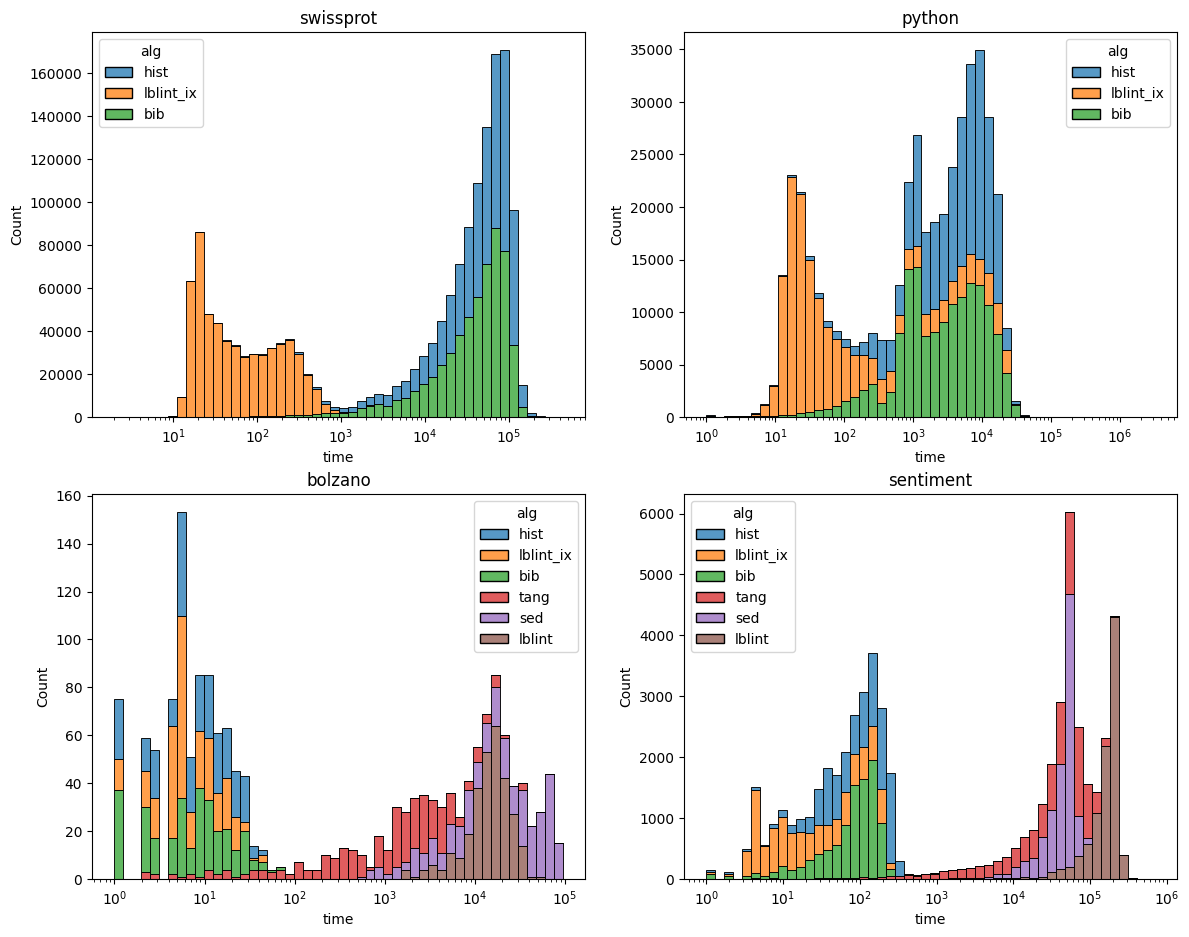

In [61]:
f, axes = plt.subplots(2, 2, figsize=(14, 11))
for i, (ds, x) in enumerate(tested_values):
    ax = i % 2
    ay = int(i >= 2)
    axes[ax][ay].set_title(ds)
    print('Printing ', ds)
    df = pd.DataFrame()
    for alg in dataframes[ds].keys():
        times = dataframes[ds][alg][0].copy()
        times['alg'] = alg
        df = pd.concat([df, times])
    sns.histplot(data=df, x="time", hue="alg", bins=50, log_scale=True, multiple="stack", ax=axes[ax][ay])

In [96]:
summary = dataframes[ds][alg][1].copy()
summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
summary

,Correct trees,Incorrect trees,Precision,Total Time,tpt
0,173296,346429,33.3438,1603230000,3084.765982


alg,bib,hist,lblint,lblint_ix,sed,tang
ds,,,,,,
bolzano,15.93620,30.5181,51.4025,57.5237,68.5367,32.60380
python,9.47851,26.2564,0.0000,73.0748,0.0000,0.00000
sentiment,1.28783,13.4704,33.3438,37.9065,56.2107,2.60673
swissprot,4.35102,53.8202,0.0000,84.3493,0.0000,0.00000


<Axes: xlabel='alg', ylabel='ds'>

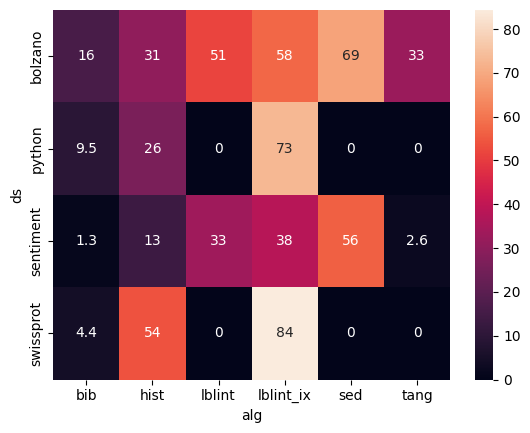

In [98]:
df = pd.DataFrame()

for i, (ds, x) in enumerate(tested_values):
    for alg in dataframes[ds].keys():
        summary = dataframes[ds][alg][1].copy()
        summary['alg'] = alg
        summary['ds'] = ds
        # tpt - time per tree - total time / (number of trees)
        summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
        df = pd.concat([df, summary])
df

pivoted = df.pivot(index="ds", columns="alg", values="Precision").fillna(0)
display(pivoted)
sns.heatmap(pivoted, annot=True)

,Correct trees,Incorrect trees,Precision,Total Time,alg,ds,tpt
0,256135,219774,53.82020,32017902000,hist,swissprot,67277.361849
0,256135,47525,84.34930,73452000,lblint_ix,swissprot,241.888955
0,256135,5630652,4.35102,27790311000,bib,swissprot,4720.794382
0,2309,5257,30.51810,3000,hist,bolzano,0.396511
0,2309,1705,57.52370,2000,lblint_ix,bolzano,0.498256
0,2309,12180,15.93620,2000,bib,bolzano,0.138036
0,2309,4773,32.60380,820000,tang,bolzano,115.786501
0,2309,1060,68.53670,9045000,sed,bolzano,2684.772930
0,2309,2183,51.40250,4944000,lblint,bolzano,1100.623330
0,74661157,209692962,26.25640,929178000,hist,python,3.267679


alg,bib,hist,lblint,lblint_ix,sed,tang
ds,,,,,,
bolzano,0.138036,0.396511,1100.623330,0.498256,2684.772930,115.786501
python,1.018907,3.267679,0.000000,2.281885,0.000000,0.000000
sentiment,0.077064,0.998060,3084.765982,1.047757,1398.031768,63.632083
swissprot,4720.794382,67277.361849,0.000000,241.888955,0.000000,0.000000


<Axes: xlabel='alg', ylabel='ds'>

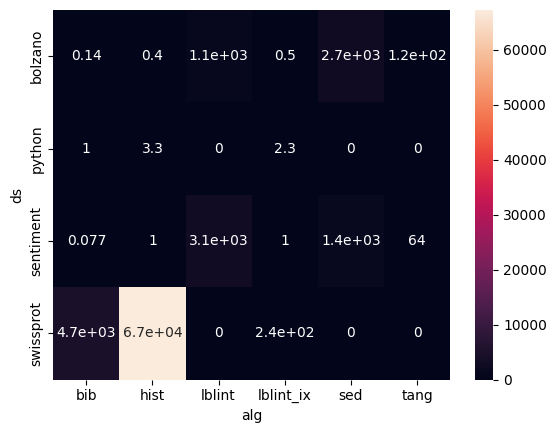

In [100]:
df = pd.DataFrame()

for i, (ds, x) in enumerate(tested_values):
    for alg in dataframes[ds].keys():
        summary = dataframes[ds][alg][1].copy()
        summary['alg'] = alg
        summary['ds'] = ds
        # tpt - time per tree - total time / (number of trees)
        summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
        df = pd.concat([df, summary])
display(df)

pivoted = df.pivot(index="ds", columns="alg", values="tpt").fillna(0)
display(pivoted)
sns.heatmap(pivoted, annot=True)

In [37]:
df.tail()

,time,alg
0,0,lblint_ix
1,0,lblint_ix
2,0,lblint_ix
3,0,lblint_ix
4,0,lblint_ix


<Axes: xlabel='time', ylabel='Count'>

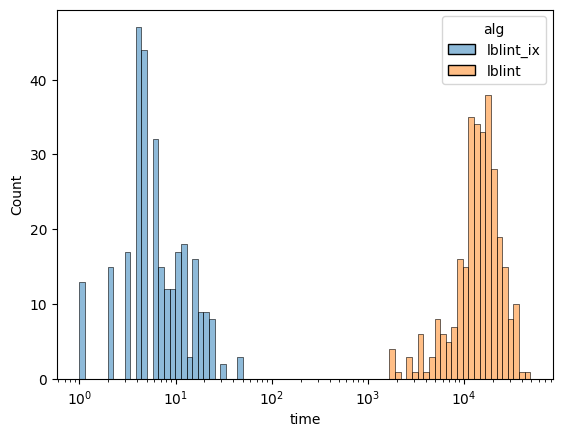

In [52]:
sns.histplot(data=df, x="time", hue="alg", log_scale=True, bins=80)


<Axes: ylabel='Count'>

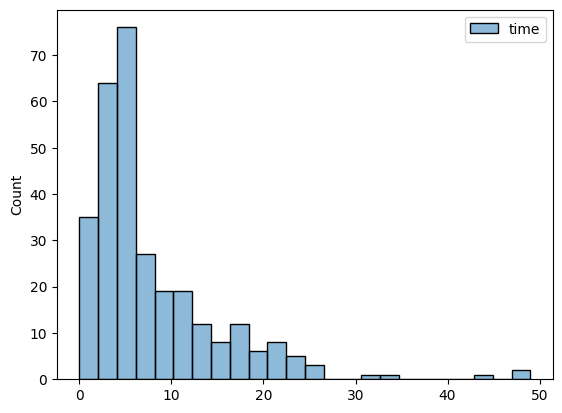

In [39]:
sns.histplot(data=dataframes['bolzano']['lblint_ix'][0])

In [ ]:
sns.heatmap()

In [ ]:
glue.pivot(index="Model", columns="Task", values="Score")